## Imports

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Audio processing
import librosa as lb
import librosa.display
import IPython.display as ipd

In [10]:
metadata_loc = ''
audio_loc = 'sample_audio/'

In [11]:
train = pd.read_csv(metadata_loc + 'train_metadata.csv')

In [16]:
test_idx = 0
test_row = train.iloc[test_idx]

audio_path = audio_loc + test_row['primary_label'] + '/' + test_row['filename']
ipd.Audio(audio_path)

## Plot

SIGNAL SHAPE: (480000,)


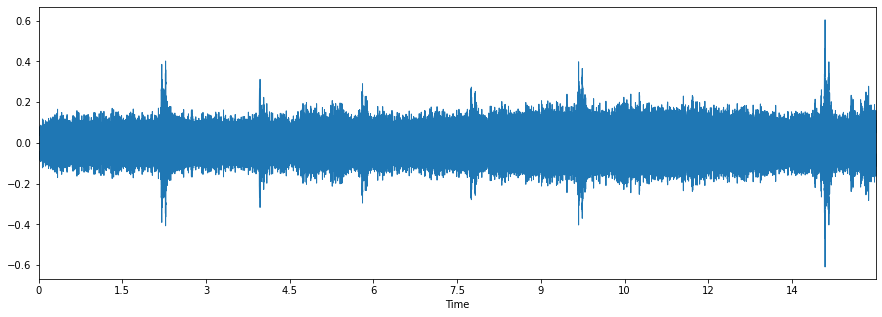

In [21]:
sig, rate = librosa.load(audio_path, sr=32000, offset=None, duration=15)
print('SIGNAL SHAPE:', sig.shape)

plt.figure(figsize=(15, 5))
librosa.display.waveplot(sig, sr=32000)
plt.show()

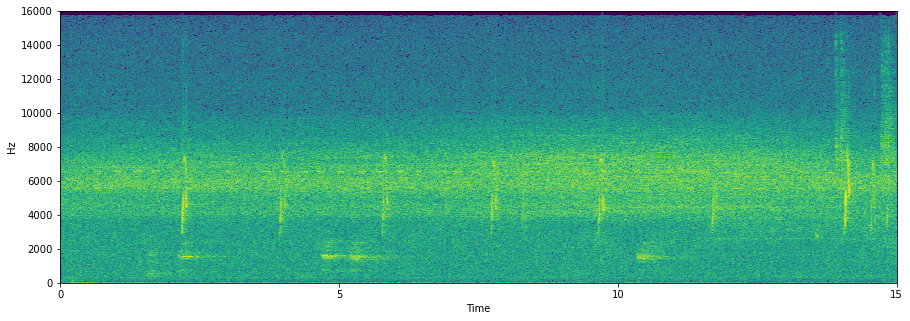

In [24]:
# First, compute the spectrogram using the "short-time Fourier transform" (stft)
spec = librosa.stft(sig)

# Scale the amplitudes according to the decibel scale
spec_db = librosa.amplitude_to_db(np.abs(spec), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(spec_db, 
                         sr=32000, 
                         x_axis='time', 
                         y_axis='hz', 
                         cmap=plt.get_cmap('viridis'))
plt.show()

In [25]:
print('SPEC SHAPE:', spec_db.shape)

SPEC SHAPE: (1025, 938)


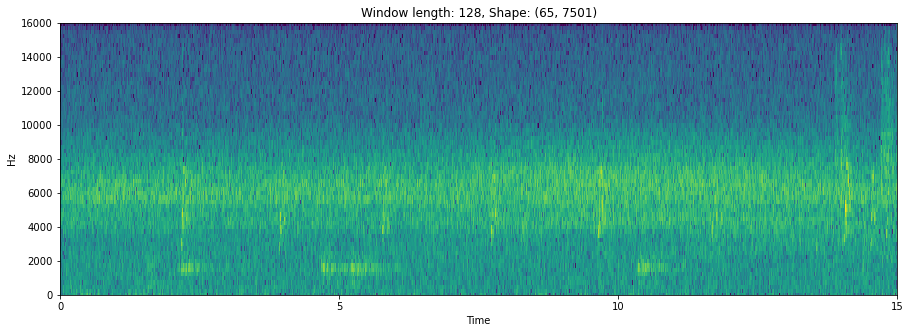

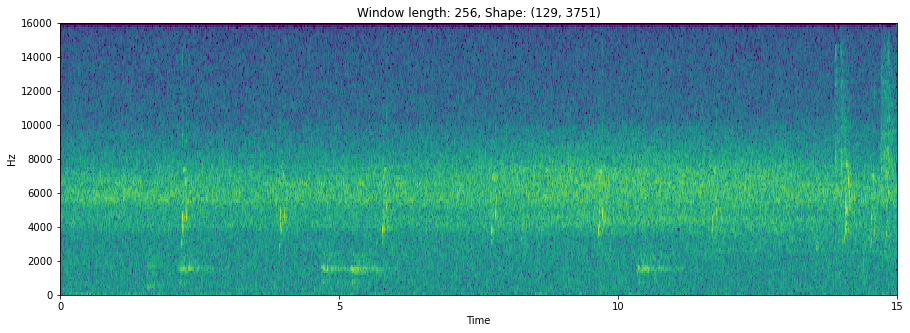

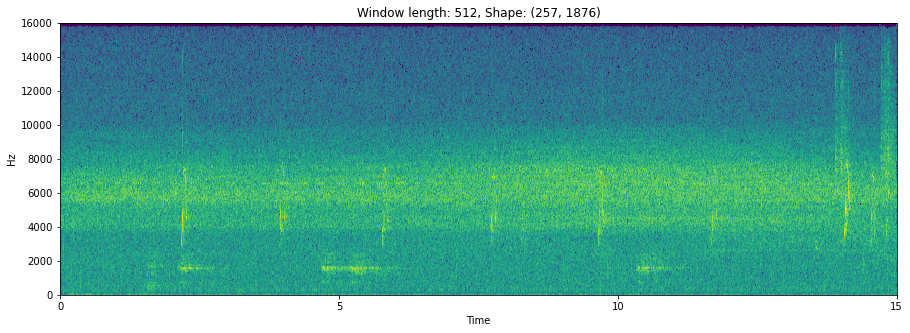

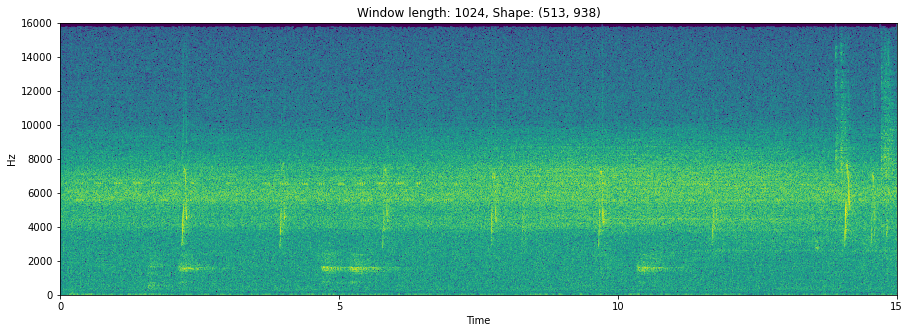

In [27]:
# Try a few window lengths (should be a power of 2)
for win_length in [128, 256, 512, 1024]:
    
    # We want 50% overlap between samples
    hop_length = win_length // 2
    
    # Compute spec (win_length implicity also sets n_fft and vice versa)
    spec = librosa.stft(sig, 
                        n_fft=win_length, 
                        hop_length=hop_length)
    
    # Scale to decibel scale
    spec_db = librosa.amplitude_to_db(np.abs(spec), ref=np.max)
    
    # Show plot
    plt.figure(figsize=(15, 5))
    plt.title('Window length: ' + str(win_length) + ', Shape: ' + str(spec_db.shape))
    librosa.display.specshow(spec_db, 
                             sr=32000, 
                             hop_length=hop_length, 
                             x_axis='time', 
                             y_axis='hz', 
                             cmap=plt.get_cmap('viridis'))

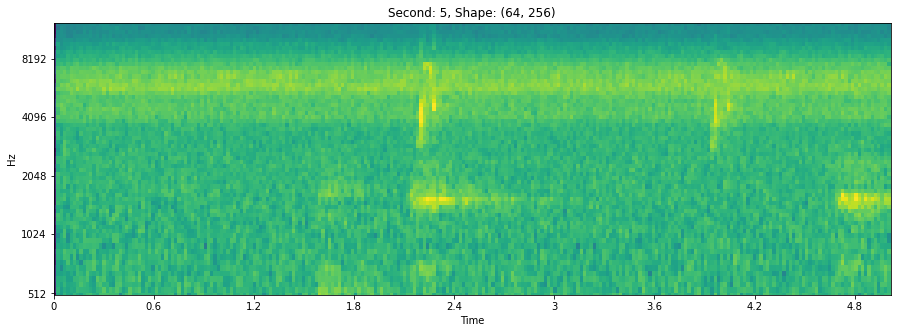

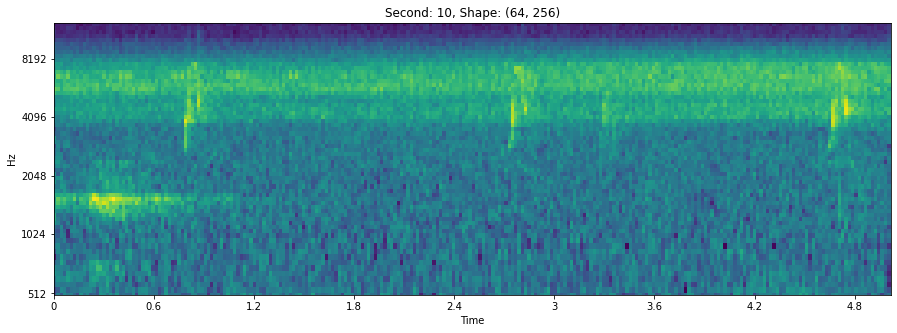

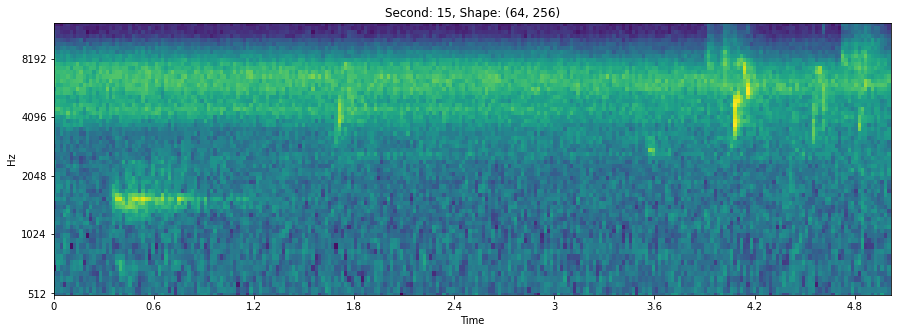

In [28]:
# Desired shape of the input spectrogram
SPEC_HEIGHT = 64
SPEC_WIDTH = 256

# Derive num_mels and hop_length from desired spec shape
# num_mels is easy, that's just spec_height
# hop_length is a bit more complicated
NUM_MELS = SPEC_HEIGHT
HOP_LENGTH = int(32000 * 5 / (SPEC_WIDTH - 1)) # sample rate * duration / spec width - 1 == 627

# High- and low-pass frequencies
# For many birds, these are a good choice
FMIN = 500
FMAX = 12500

# Let's get all three spectrograms
for second in [5, 10, 15]:  
    
    # Get start and stop sample
    s_start = (second - 5) * 32000
    s_end = second * 32000

    # Compute the spectrogram and apply the mel scale
    mel_spec = librosa.feature.melspectrogram(y=sig[s_start:s_end], 
                                              sr=32000, 
                                              n_fft=1024, 
                                              hop_length=HOP_LENGTH, 
                                              n_mels=NUM_MELS, 
                                              fmin=FMIN, 
                                              fmax=FMAX)
    
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Show the spec
    plt.figure(figsize=(15, 5))
    plt.title('Second: ' + str(second) + ', Shape: ' + str(mel_spec_db.shape))
    librosa.display.specshow(mel_spec_db, 
                             sr=32000, 
                             hop_length=HOP_LENGTH, 
                             x_axis='time', 
                             y_axis='mel',
                             fmin=FMIN, 
                             fmax=FMAX, 
                             cmap=plt.get_cmap('viridis'))